Se ha usado ChatGPT para el brainstorming y GitHub Copilot para el autocompletado.

Se usará la técnica del algoritmo de flujo máximo porque también resuelve problemas de acoplamiento (asignación).

In [11]:
from graphviz import Digraph
from IPython.display import display, Image
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

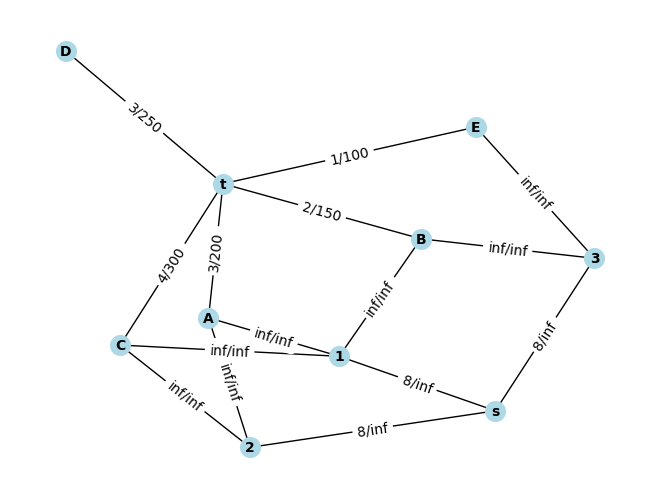

In [12]:

G = nx.Graph()

G.add_edge('s', '1', time = 8, value = float('inf'))
G.add_edge('s', '2', time = 8, value = float('inf'))
G.add_edge('s', '3', time = 8, value = float('inf'))

def add_emp_to_proy(emp, proy):
    G.add_edge(emp, proy, time = float('inf'), value = float('inf'))

conn = [('1', 'A'), ('1', 'B'), ('1', 'C'), ('2', 'A'), ('2', 'C'), ('3', 'B'), ('3', 'E')]
for c in conn:
    add_emp_to_proy(c[0], c[1])


G.add_edge('A', 't', time = 3, value = 200)
G.add_edge('B', 't', time = 2, value = 150)
G.add_edge('C', 't', time = 4, value = 300)
G.add_edge('D', 't', time = 3, value = 250)
G.add_edge('E', 't', time = 1, value = 100)
def print_graph(G):
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'value')
    time_labels = nx.get_edge_attributes(G, 'time')
    combined_labels = {k: f"{time_labels[k]}/{v}" for k, v in edge_labels.items()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_labels)
    plt.show()

print_graph(G)

In [13]:
# Clase para representar el algoritmo de Edmonds-Karp
class CEK:
    def __init__(self, graph):
        self.grafo = graph
        self.grafo_residual = {}
        self.flujos = {}
        self.CreaGrafoResidual()

    def CreaGrafoResidual(self):
        for u, v, data in self.grafo.edges(data=True):
            if u not in self.grafo_residual:
                self.grafo_residual[u] = {}
            if v not in self.grafo_residual:
                self.grafo_residual[v] = {}
                self.grafo_residual[u][v] = data['value']
                self.grafo_residual[v][u] = 0
                self.flujos[(u, v)] = 0
                self.flujos[(v, u)] = 0

    def BFS(self, fuente, sumidero, padre):
        visitados = set()
        cola = deque([fuente])
        visitados.add(fuente)
        while cola:
            nodo = cola.popleft()
            for vecino, capacidad in self.grafo_residual[nodo].items():
                if vecino not in visitados and capacidad > 0:
                    padre[vecino] = nodo
                    cola.append(vecino)
                    visitados.add(vecino)
                    if vecino == sumidero:
                        return True
        return False

    def EK(self, fuente, sumidero):
        flujo_maximo = 0
        padre = {}
        while self.BFS(fuente, sumidero, padre):
            camino_flujo = float('inf')
            s = sumidero
            while s != fuente:
                camino_flujo = min(camino_flujo, self.grafo_residual[padre[s]][s])
                s = padre[s]
            v = sumidero
            while v != fuente:
                u = padre[v]
                self.grafo_residual[u][v] -= camino_flujo
                self.grafo_residual[v][u] += camino_flujo
                self.flujos[(u, v)] += camino_flujo
                self.flujos[(v, u)] -= camino_flujo
                v = padre[v]
            flujo_maximo += camino_flujo
        return flujo_maximo

    def muestraFlujos(self):
        for u in self.grafo:
            for v, capacidad in self.grafo[u]:
                if (u, v) in self.flujos and self.flujos[(u, v)] > 0:
                    print(f"Flujo de {u} a {v}: {self.flujos[(u, v)]}/{capacidad}")

    def muestraGrafo(self):
        pos = nx.spring_layout(self.grafo)
        edge_labels = nx.get_edge_attributes(self.grafo, 'value')
        time_labels = nx.get_edge_attributes(self.grafo, 'time')
        combined_labels = {k: f"{time_labels[k]}/{v}" for k, v in edge_labels.items()}
        nx.draw(self.grafo, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=combined_labels)
        plt.show()

    def suma_nodos_conectados_a_t(self):
        suma = 0
        for nodo in self.grafo.predecessors('t'):
            if self.flujos[(nodo, 't')] == self.grafo[nodo]['t']['time']:
                suma += 1
        return suma

200


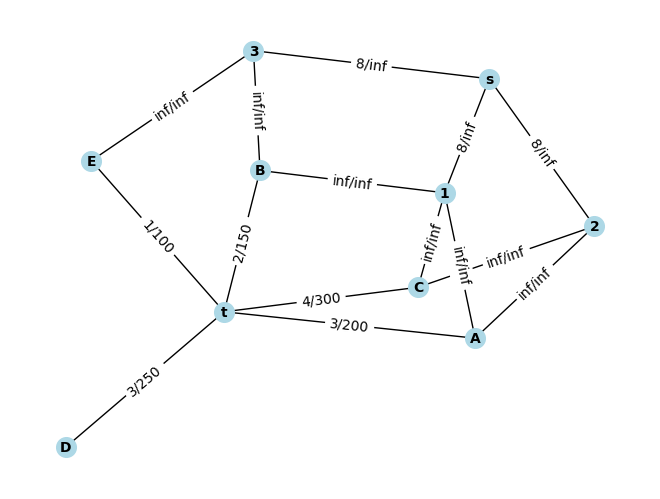

In [14]:
ek = CEK(G)
print(ek.EK('s', 't'))
ek.muestraGrafo()